# **Plot Module**

The plot module has a wide variety of tools to plot different sets of data. All the tools have been done with the idea of modularity and work well mixed with usual matplotlib sintax as they allow to aim for a certain subplot when plotted. This way one can tweak the defaults either with the provided variables or manually within matplotlib (check the Customization section).  

**<font color='red'>So far the code supports:</font>**
- *I. Bandstructures:*
    - **Plotting band structures** of Quantum Espresso, VASP, Wannier90 and Wanniertools.
    - **Comparing band structures** of different ab initio codes.
- *II. Phonons spectra:*
    - **Plotting phonon spectra** computed with Quantum Espresso (ph.x).
    - **Comparing phonon spectra**, for example with different grids (can be highligted), pressures...
---
>*The **documentation** of every function is accesible with the usual **shift + tab** shortcut.*
---

# I. Bands

In [1]:
from yaiv import plot

## 1. Minimal plotting

One can plot the band structure just from the raw output file from a variety of codes *(Quantum Espresso, VASP, Wannier90, Wanniertools...)*.  
Combined with the ability of zomming in (use of **ipympl**) is easy to explore new data.

### QE

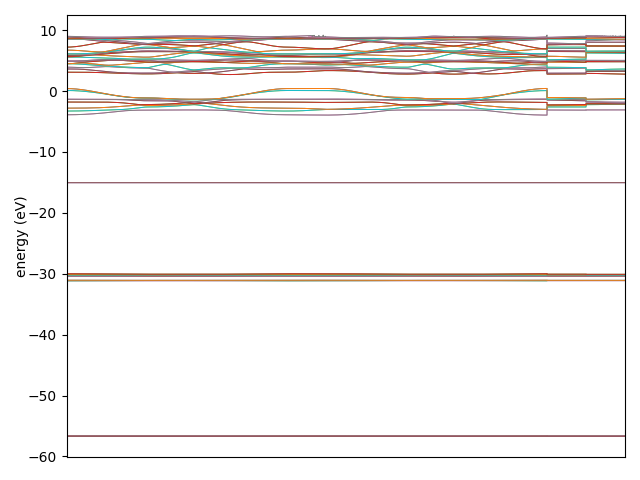

In [2]:
plot.bands(file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo')

### VASP

CAUTIION: There was no cell introduced, threfore distances are wrong


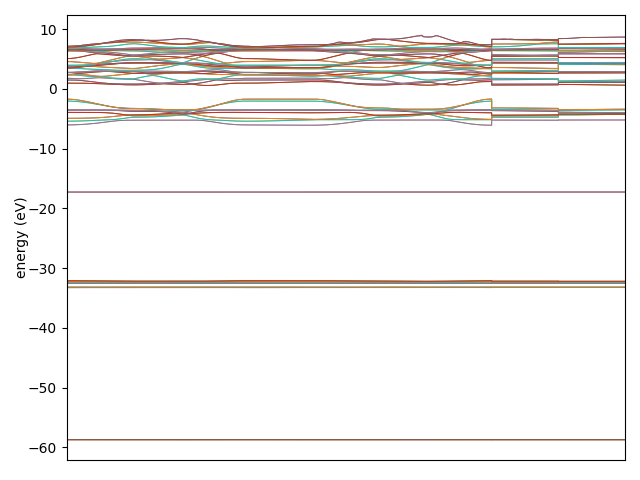

In [3]:
plot.bands(file='DATA/bands/VASP/EIGENVAL_BS')

### Wannier90

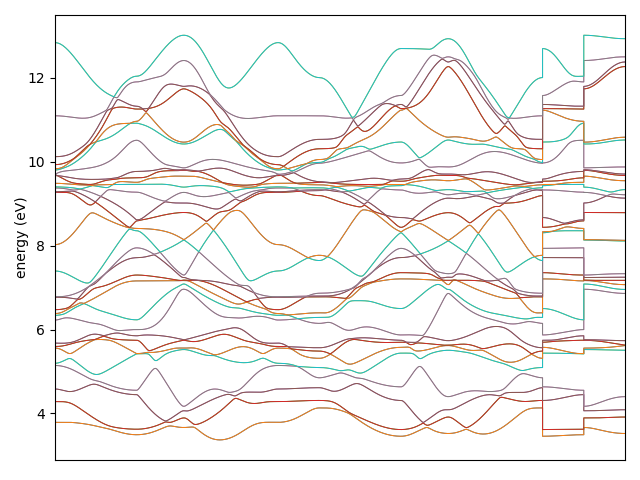

In [4]:
plot.bands(file='DATA/bands/Wannier90/CsV3Sb5_band.dat')

## 2. Non-minimal

- By introducing a few more files in the input, we can get a publication ready plot superfast!. Use the **save_as='name.png'** variable to directly save the plot in high resolution.
- Nice plots can be obtained with very **minimal input**, however, almost any important parameter can be overwritten.
- Any **KPATH file** containing an optimal path for the specific space group can be obtained in the [TQC website](https://www.topologicalquantumchemistry.fr/#/). (Enter in any compound and click in the Download KPATH link).
    - You can still use your own paths, look at the **ticks** and **labels** variables.


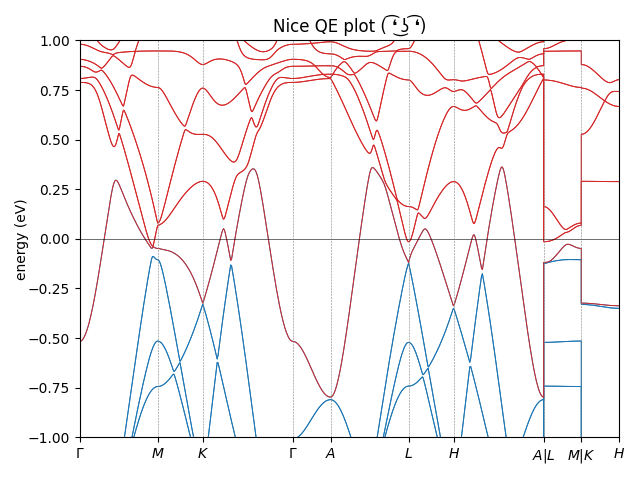

In [2]:
plot.bands(file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',    #raw data file with the band structure
                KPATH='DATA/bands/KPATH',                           #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo', #File needed to read the Fermi level, number of electrons and lattice parameters
                title='Nice QE plot ( ͡❛ ͜ʖ ͡❛)')                      # A title of your liking

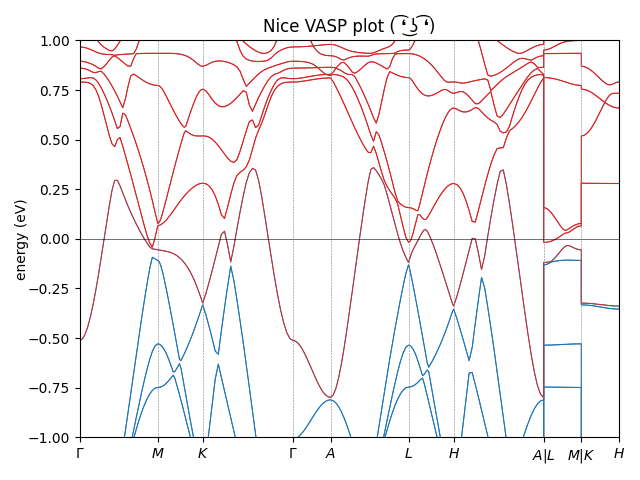

In [3]:
plot.bands(file='DATA/bands/VASP/EIGENVAL_BS',    #raw data file with the band structure
                KPATH='DATA/bands/KPATH',         #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/VASP/OUTCAR_SCC',#File needed to read the Fermi level, number of electrons and lattice parameters
                title='Nice VASP plot ( ͡❛ ͜ʖ ͡❛)')# A title of your liking

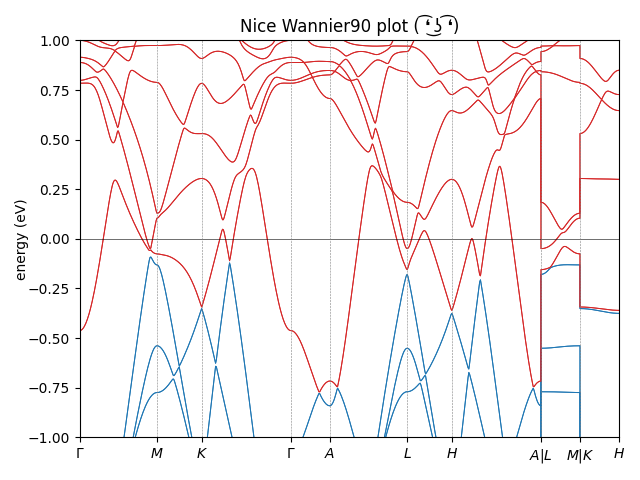

In [8]:
plot.bands(file='DATA/bands/Wannier90/CsV3Sb5_band.dat',#raw data file with the band structure
                KPATH='DATA/bands/KPATH',                #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo',#File needed to read the Fermi level, number of electrons and lattice parameters
                title='Nice Wannier90 plot ( ͡❛ ͜ʖ ͡❛)',   # A title of your liking
                num_elec=30)                              #Manually overwriting the number of electrons (we are not wannierizing all the bands)

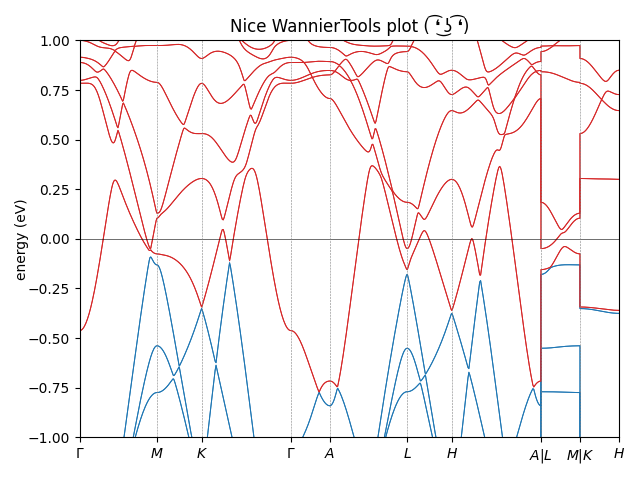

In [9]:
plot.bands(file='DATA/bands/WannierTools/bulkek.dat',               #raw data file with the band structure
                KPATH='DATA/bands/KPATH',                           #File with the Kpath (in order to plot the ticks at the High symmetry points)
                aux_file='DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo',#File needed to read the number of electrons and lattice parameters
                title='Nice WannierTools plot ( ͡❛ ͜ʖ ͡❛)',          # A title of your liking
                fermi=0,                                            #manually overwritting the fermi energy
                num_elec=30)                                        #Manually overwriting the number of electrons (we are not wannierizing all the bands)

## 3. Compare different codes

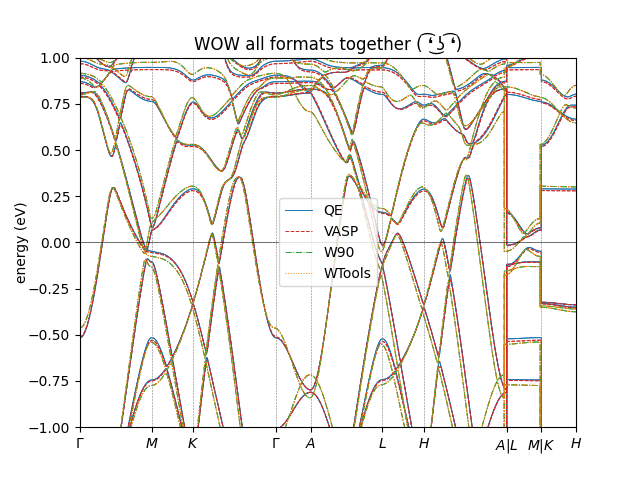

In [10]:
from yaiv import utils
files=['DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',
      'DATA/bands/VASP/EIGENVAL_BS',
      'DATA/bands/Wannier90/CsV3Sb5_band.dat',
      'DATA/bands/WannierTools/bulkek.dat']
KPATH='DATA/bands/KPATH'
fermi=[utils.grep_fermi('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo'),
      utils.grep_fermi('DATA/bands/VASP/OUTCAR_SCC'),
      utils.grep_fermi('DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo'),
      0]
legends=['QE','VASP','W90','WTools']
plot.bands_compare(files,KPATH,fermi,legends,title='WOW all formats together ( ͡❛ ͜ʖ ͡❛)')

# II. Phonons

In [1]:
from yaiv import plot

## 1.Minimal plotting

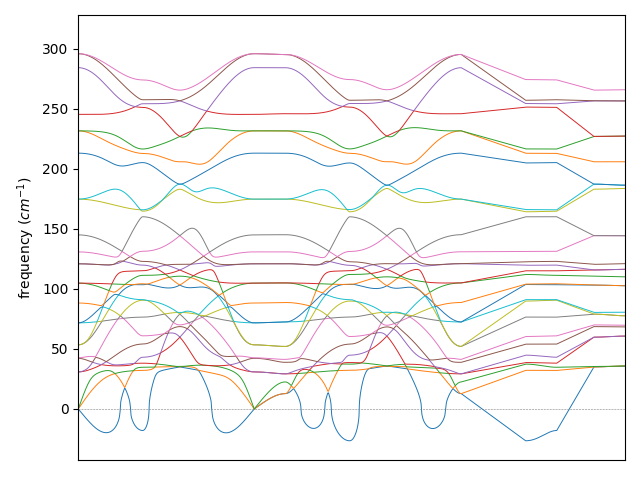

In [2]:
plot.phonons(file='DATA/phonons/2x2x2/results_matdyn/CsV3Sb5.freq.gp')

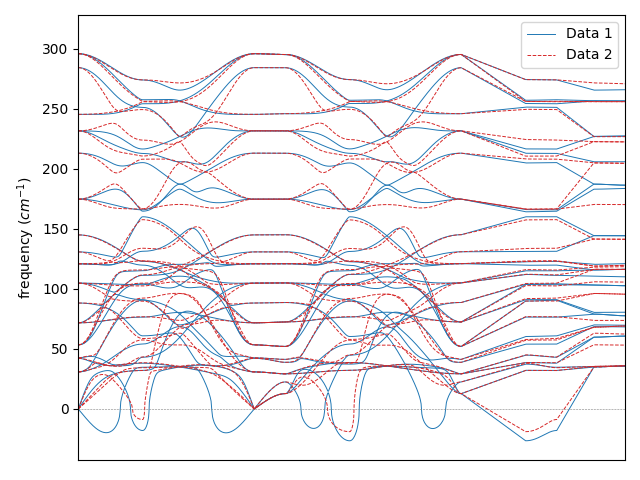

In [3]:
files=['DATA/phonons/2x2x2/results_matdyn/CsV3Sb5.freq.gp',
      'DATA/phonons/3x3x2/results_matdyn/CsV3Sb5.freq.gp']
plot.phonons_compare(files)

## 2. Non-Minimal

- By introducing a few more files in the input, we can get a publication ready plot superfast!. Use the **save_as='name.png'** variable to directly save the plot in high resolution.
- Nice plots can be obtained with very **minimal input**, however, almost any important parameter can be overwritten.
- Any **KPATH file** containing an optimal path for the specific space group can be obtained in the [TQC website](https://www.topologicalquantumchemistry.fr/#/). (Enter in any compound and click in the Download KPATH link).
    - You can still use your own paths, look at the **ticks** and **labels** variables.
- When plotting phonon spectras one should be aware that most is just an interpolation. To this end, the code can **highlight the computed DFPT phonons**, from which the whole spectrum is interpolated.

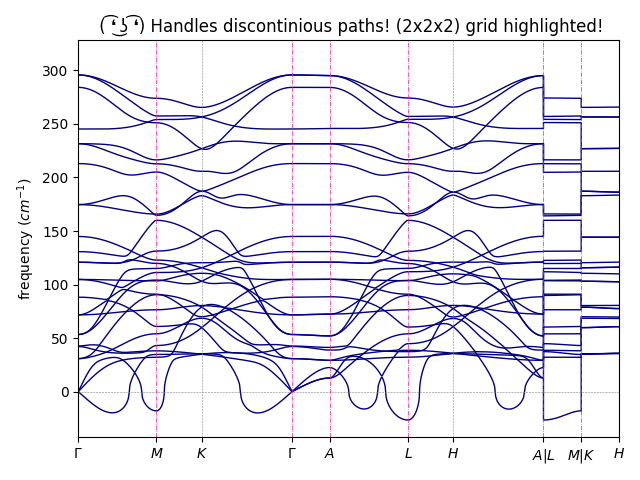

In [7]:
#grid = True highlights the DFPT computed phonons used to interpolate the whole spectrum.

plot.phonons(file='DATA/phonons/2x2x2/results_matdyn/CsV3Sb5.freq.gp', #raw data file with the phonon spectrum
            KPATH='DATA/bands/KPATH',                                 #File with the Kpath (in order to plot the ticks at the High symmetry points)
            ph_out='DATA/phonons/2x2x2/results_ph/CsV3Sb5.ph.pwo',    #File with the phonon grid points and lattice vectors.
            title=' ( ͡❛ ͜ʖ ͡❛) Handles discontinious paths! (2x2x2) grid highlighted!',   # A title of your liking
            grid=True,color='navy',linewidth=1)                        #Non-mandatory customization

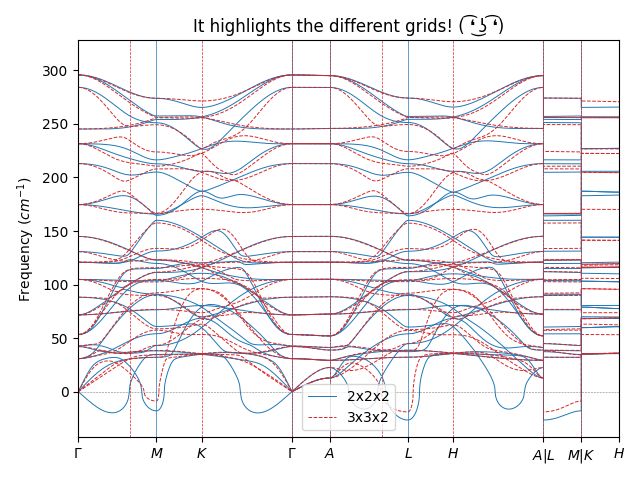

In [100]:
files=['DATA/phonons/2x2x2/results_matdyn/CsV3Sb5.freq.gp',
      'DATA/phonons/3x3x2/results_matdyn/CsV3Sb5.freq.gp']  #List of files to plot
KPATH='DATA/bands/KPATH'                                    #File with the Kpath (in order to plot the ticks at the High symmetry points)
ph_outs=['DATA/phonons/2x2x2/results_ph/CsV3Sb5.ph.pwo',
      'DATA/phonons/3x3x2/results_ph/CsV3Sb5.ph.pwo']       #File with the phonon grids points and lattice vectors.
legends=['2x2x2','3x3x2']                                   #Legends for each data set
title='It highlights the different grids! ( ͡❛ ͜ʖ ͡❛)'       #A title of your liking

plot.phonons_compare(files,KPATH,ph_outs,legends,title)

# III. Customization

## 1. Create your own figures

All the plotting tools have been done with **matplotlib compatibility** in mind. Almost any default can be overwritten with matplotlib. Here I show some examples:

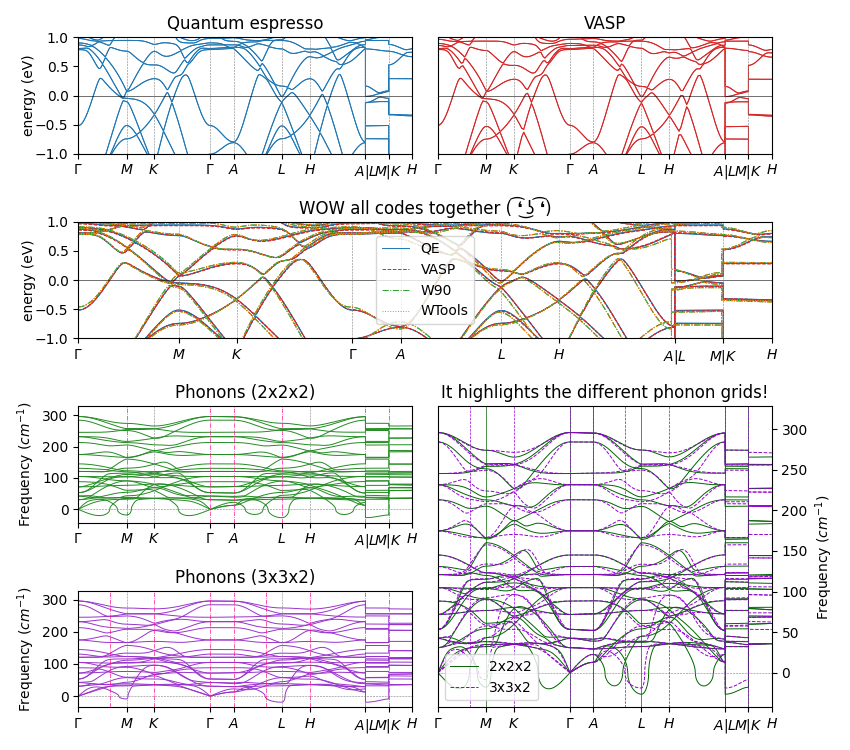

In [97]:
from yaiv import utils
from yaiv import plot
import matplotlib.pyplot as plt

#NEEDED files
KPATH='DATA/bands/KPATH'              #File with the Kpath (in order to plot the ticks at the High symmetry points)
aux1='DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo' #Aux files needed to read the number of electrons and lattice parameters
aux2='DATA/bands/VASP/OUTCAR_SCC'
aux3='DATA/bands/Wannier90/results_nscf/CsV3Sb5.nscf.pwo'

el_files=['DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo',   #raw data file with the band structure
      'DATA/bands/VASP/EIGENVAL_BS',
      'DATA/bands/Wannier90/CsV3Sb5_band.dat',
      'DATA/bands/WannierTools/bulkek.dat']

ph_files=['DATA/phonons/2x2x2/results_matdyn/CsV3Sb5.freq.gp',
         'DATA/phonons/3x3x2/results_matdyn/CsV3Sb5.freq.gp']
ph_outs=['DATA/phonons/2x2x2/results_ph/CsV3Sb5.ph.pwo',
       'DATA/phonons/3x3x2/results_ph/CsV3Sb5.ph.pwo']

fermi=[utils.grep_fermi(aux1),utils.grep_fermi(aux2),utils.grep_fermi(aux3),0]  #Fermi energies
legends_el=['QE','VASP','W90','WTools']                      #Your desired legends
legends_ph=['2x2x2','3x3x2']                                 #Your desired legends

#Prepare your layout as usual
fig,axes=plt.subplots(4,2,figsize=(8.5,7.5))
[[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]]=axes
gs = axes[2, 1].get_gridspec()
ax3.remove(),ax4.remove()
ax3= fig.add_subplot(gs[1, :])
ax6.remove(),ax8.remove()
ax8= fig.add_subplot(gs[2:, 1])

#Plot the different subplots
plot.bands(el_files[0],KPATH,aux1,'Quantum espresso',axis=ax1,color='tab:blue')  #Subplot 1
plot.bands(el_files[1],KPATH,aux2,'VASP',axis=ax2,color='tab:red') #Subplot 2

ax2.set_ylabel('')              #Regular matplotlib sintax to remove axis
ax2.set_yticks([])

plot.bands_compare(el_files,KPATH,fermi,legends_el,title='WOW all codes together ( ͡❛ ͜ʖ ͡❛)',axis=ax3) #Subplot 3
plot.phonons(ph_files[0],KPATH,ph_outs[0],'Phonons (2x2x2)',axis=ax5,color='forestgreen')     #Subplot 4
plot.phonons(ph_files[1],KPATH,ph_outs[1],'Phonons (3x3x2)',axis=ax7,color='darkorchid')    #Subplot 5
plot.phonons_compare(ph_files,KPATH,ph_outs,legends_ph,'It highlights the different phonon grids!',
                     colors=['darkgreen','darkviolet'],axis=ax8) #Subplot 6

ax8.yaxis.set_label_position("right") #Regular matplotlib sintax to move axis to the right
ax8.yaxis.tick_right()

plt.tight_layout()
plt.show()

## 2. Set your variables manually 

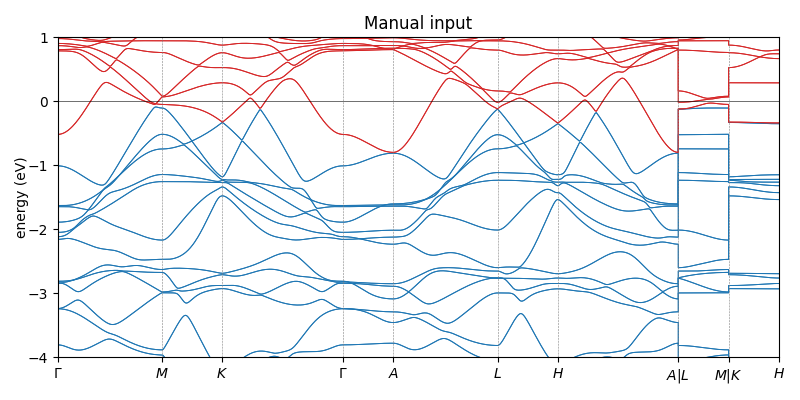

In [12]:
from yaiv import utils
from yaiv import plot
import numpy as np

# INPUT PARAMETERS***********************************************************************
file='DATA/bands/QE/results_bands/CsV3Sb5.bands.pwo'    #raw data file with the band structure
title='Manual input'                                    # A title of your liking
vectors=np.array([[ 1.      ,  0.      ,  0.      ],   #Lattice parameters needed to locate the ticks
                [-0.5     ,  0.866025,  0.      ],
                [ 0.      ,  0.      ,  1.794751]])
#Try: vectors = utils.grep_vectors(file)

ticks = np.array([[  0.     ,   0.     ,   0.     , 100.     ], #High symmetry points coordinates
       [  0.5    ,   0.     ,   0.     , 100.     ],
       [  0.33333,   0.33333,   0.     , 100.     ],
       [  0.     ,   0.     ,   0.     , 100.     ],
       [  0.     ,   0.     ,   0.5    , 100.     ],
       [  0.5    ,   0.     ,   0.5    , 100.     ],
       [  0.33333,   0.33333,   0.5    , 100.     ],
       [  0.     ,   0.     ,   0.5    ,   1.     ],
       [  0.5    ,   0.     ,   0.5    , 100.     ],
       [  0.5    ,   0.     ,   0.     ,   1.     ],
       [  0.33333,   0.33333,   0.     , 100.     ],
       [  0.33333,   0.33333,   0.5    ,   1.     ]])
#Try: ticks=utils.grep_ticks_QE('DATA/bands/QE/results_bands/CsV3Sb5.bands.pwi')
labels=['$\\Gamma$', '$M$', '$K$', '$\\Gamma$', '$A$', '$L$', '$H$', '$A|L$', '$M|K$', '$H$'] #Labels of the high symmetry points
#Try: ticks,labels=utils.grep_ticks_labels_KPATH('DATA/bands/KPATH')
fermi = 7.72                                            #Shift the energy according to the Fermi level
#Try: fermi = utils.grep_fermi('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo')
num_elec = 72                                           #Number of electrons to differ between valence and conduction bands
#Try: num_elec = utils.grep_electrons('DATA/bands/QE/results_scf/CsV3Sb5.scf.pwo')

# PLOT PARAMETERS***********************************************************************
plot.bands(file=file,
           title=title,
           vectors=vectors,
           ticks=ticks,
           labels = labels,
           fermi = fermi,
           window = [-4,1],            #Window of energies you want to see
           num_elec=72,
           figsize=(8,4)               #Any figure size           
          )